In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


dataFrame = load_boston()

In [ ]:
df = pd.DataFrame(dataFrame.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.columns = dataFrame.feature_names

In [ ]:
df['price'] = dataFrame.target

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
mse = cross_val_score(linreg,X,y,scoring='neg_mean_squared_error', cv=10)

In [ ]:
mean_mse = np.mean(mse)
mean_mse

-34.705255944524914

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[88,2,3,4,1000,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [88, 2, 3, 4, 1000, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_) #MSE

{'alpha': 100}
-29.61522009733517


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasoreg = Lasso()
parameters={'alpha':[88,2,3,4,1000,1,5,10,20,30,35,40,45,50,55,100]}
lassoregressor = GridSearchCV(lasoreg,parameters,scoring='neg_mean_squared_error', cv=5)
lassoregressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [88, 2, 3, 4, 1000, 1, 5, 10, 20, 30, 35, 40,
                                   45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print(lassoregressor.best_params_)
print(lassoregressor.best_score_) #MSE

{'alpha': 1}
-35.531580220694856


In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=7)

In [ ]:
prediction_lasso=lassoregressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

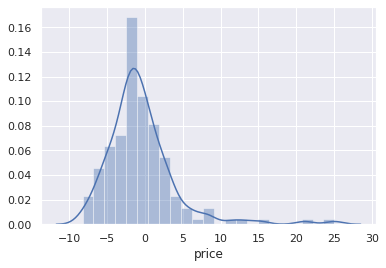

In [ ]:
import seaborn as sns
sns.set()
sns.distplot(y_test-prediction_lasso)

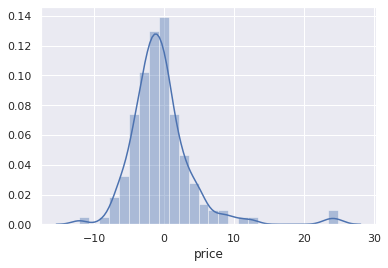

In [ ]:
sns.distplot(y_test-prediction_ridge)